In [42]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd 

Getting all the imports 

In [43]:
portfolio= {
    "INFY.NS":15,
    "TCS.NS":10,
    "RELIANCE.NS":5
}

Making a portfolio 

In [44]:
tickers=list(portfolio.keys()) #putting all the tickers in a list
data=yf.download(tickers,period="30d",auto_adjust=True)['Close'] #downloading the auto adjusted data for 30days
if data.empty:
    raise ValueError("NO DATA FOUND")
if set(data.columns) != set(tickers):
    raise ValueError("TICKERS MISMATCH")
print(data.head(5)) #debug statement 


[*********************100%***********************]  3 of 3 completed

Ticker          INFY.NS  RELIANCE.NS       TCS.NS
Date                                             
2025-04-11  1409.449951  1218.949951  3231.500000
2025-04-15  1426.000000  1240.099976  3248.199951
2025-04-16  1413.099976  1239.300049  3273.800049
2025-04-17  1419.500000  1274.500000  3298.899902
2025-04-21  1451.000000  1295.500000  3321.600098


In [45]:
for ticker, shares in portfolio.items():
    data[ticker] *= shares #iterating though the portfolio and multiplying w/ share count

portfolio_value = data.sum(axis=1) #totaling the portfolio value (row-wise sum)


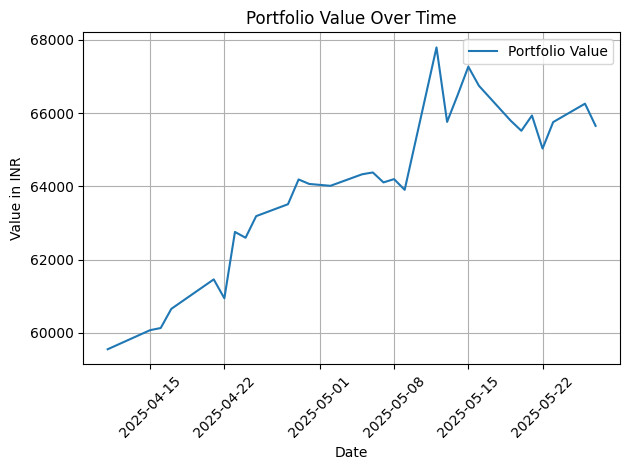

In [46]:
plt.plot(figsize=(20, 10))
plt.plot(portfolio_value, label='Portfolio Value')
plt.xticks(rotation=45) #so as to improve the readability 
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value in INR')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Above is the plot showing how the portfolio has performed in the past 30 days 

In [47]:
latest_value = portfolio_value.iloc[-1]
print(f"Latest Portfolio Value: {latest_value} INR")

Latest Portfolio Value: 65648.9990234375 INR


This gives the latest porfolio value 